In [1]:
import pandas as pd

In [2]:
file_path = '/home/uceckz0/Scratch/imae/valid_file.csv'  # Change this to the path of your CSV file

df = pd.read_csv(file_path)

# Step 2: Replace the substring in the 'Address' column
old_path = '/data/che/Kewei_data/shallow_water_simulation/'
new_path = '/home/uceckz0/Scratch/imae/shallow_water_simulation/'
df['Address'] = df['Address'].str.replace(old_path, new_path)

# Step 3 (optional): Save the modified DataFrame to a new CSV file
df.to_csv(file_path , index=False)

In [19]:
import torch
import torch.nn as nn
from torch import optim
from model_imae import VisionTransformer

from matplotlib import pyplot as plt

In [20]:
device = "cpu"

In [21]:
model = VisionTransformer(3, 16, 128, device)
model = model.to(device)

# learning_rate = 1e-4
# optimizer = optim.AdamW(model.parameters(), lr=learning_rate, betas=(0.9, 0.95), weight_decay=0.03)
# scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, 700, eta_min=1e-6, last_epoch=-1, verbose=False)
# scaler = torch.cuda.amp.GradScaler()

/home/uceckz0/miniconda3/envs/imae/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
/home/uceckz0/miniconda3/envs/imae/lib/python3.9/site-packages/torch/cuda/amp/grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [23]:
# Path to the checkpoint file
checkpoint_path = "/home/uceckz0/Scratch/imae/Vit_checkpoint_9/epoch_{epoch}.pth".format(epoch=199)

# Load the checkpoint
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))

# Now, you can also access the train and evaluation losses if you need
train_loss = checkpoint['train_loss']
eval_loss = checkpoint['eval_loss']

In [6]:
# train_loss = [d['loss'] for d in train_loss]
# eval_loss = [d['loss'] for d in eval_loss]

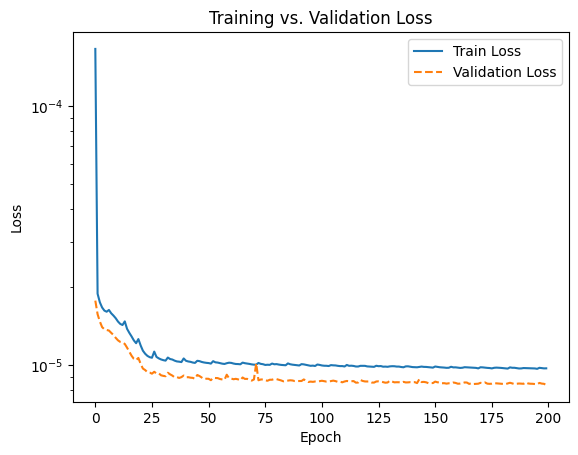

In [24]:
# Sample data for train and validation loss
epochs = list(range(0, 200))

# Create figure and axis
fig, ax = plt.subplots()

# Plot train and validation loss
ax.plot(epochs, train_loss, label='Train Loss')
ax.plot(epochs, eval_loss, label='Validation Loss', linestyle='--')

# Add legend
ax.legend()

# Add titles and labels
ax.set_title('Training vs. Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

plt.yscale('log')

# Show plot
plt.show()


In [1]:
from dataset import DataBuilder

In [2]:
train_dataset = DataBuilder('/home/uceckz0/Scratch/imae/train_file.csv',20, 10)

In [5]:
batch_size = 128

In [4]:
len(train_dataset)

13689

In [8]:
len(train_dataset) // batch_size

106

In [13]:
epoch = 200

In [16]:
epoch * 0.05 * len(train_dataset) // batch_size

1069.0